# Lecture 21 - Numerical Differentiation

## Overview, Objectives, and Key Terms
 
In [Lecture 20](ME400_Lecture_20.ipynb), Taylor series were reviewed, and SymPy was used to define and study such series.  A key idea introduced was that a *truncated* Taylor series expansion of $f(x)$ about $x_0$ is (1) accurate near the point $x_0$ and (2) made better by including additional terms of the full series.  In this lesson, such truncated series are used to define **finite difference** approximations for derivatives.  Although good for some applications by themselves, finite-difference approximations are critical for solving differential equations numerically, a topic to be covered in several lectures.

### Objectives

By the end of this lesson, you should be able to

- Derive finite-difference approximations for first- and second-order derivatives using Taylor series.
- Apply SymPy to compute finite-difference approximations of arbitrary order for any derivative.
- Numerically/graphically/symbolically demonstrate that the error of an $n$th-order approximation as $\Delta \to 0$ exhibits the right behavior.

### Key Terms

- finite difference
- forward difference
- backward difference
- central difference
- truncation error
- first-order approximation
- second-order approximation
- $n$th-order approximation

## If, in the beginning, $h$ didn't go to 0...

Recall that the derivative of $f(x)$ is

$$
  \frac{df}{dx} = \lim_{\Delta \to 0} \frac{f(x+\Delta)-f(x)}{\Delta} \, .
$$

What if that limit is not taken and, instead, a "small" value of $\Delta$ is used?  The result is our first **finite-difference** approximation, the **forward difference**:

$$
  f'(x) \approx  \frac{f(x+\Delta)-f(x)}{\Delta} \, .
$$


An equally valid approximation is the **backward difference**:
$$
  f'(x) \approx  \frac{f(x)-f(x-\Delta)}{\Delta} \, .
$$

**Exercise**: Use the backward-difference approximation to approximate the derivative of $e^x$ at $x = 1$ for $\Delta = 10^0, 10^{-1}, \ldots, 10^{-7}$ and plot the error as a function of $\Delta$.

## Back to Order

The forward-difference  (and backward-difference) approximation improves with smaller $\Delta$, but *how much better*?  

Revisit the Taylor series for $f(x+\Delta)$ about the point $x$!


$$
  f(x+\Delta) = f(x) + f'(x)\Delta + \frac{1}{2}f''(x)\Delta^2 + \mathcal{O}(\Delta^3) \, .
$$

$$
\begin{split}
  f'(x) &= \frac{f(x+\Delta) - f(x)}{\Delta} - \frac{1}{2}f''(x)\Delta + \mathcal{O}(\Delta^2) \\
        &= \frac{f(x+\Delta) - f(x)}{\Delta} + \mathcal{O}(\Delta) \\
\end{split}
$$

Error is proportional to *first power* of $\Delta$ as $\Delta \to 0$.  Hence, **the forward-difference approximation is first order** (so, too, is the backward-difference approximation).

### Can we do better than first order?  

Yes: look what happens when we expand $f(x+\Delta)-f(x-\Delta)$!

$$
\begin{split}
  f'(x) &= \frac{f(x+\Delta) - f(x)}{\Delta} - \frac{1}{2}f''(x)\Delta + \mathcal{O}(\Delta^2) \\
        &= \frac{f(x+\Delta) - f(x)}{\Delta} + \mathcal{O}(\Delta) \\
\end{split}
$$

### Can we approximate the second derivative?

Yes: look what happens when we expand $f(x+\Delta)+f(x-\Delta)$!

$$
f''(x) = \frac{f(x+\Delta)+-2f(x)+f(x-\Delta)}{\Delta^2} + \mathcal{O}(\Delta^2) \, ,
$$

**Exercise**: Apply the *central* difference to the function $f(x) = \sin(2x - 0.17) + 0.3 \cos(3.4x + 0.1)$ at $x = 0.5$. Plot the error for $\Delta = 10^{-1}, 10^{-2}, \ldots, 10^{-7}$ and *confirm graphically* that the method is second order.

## Finite-Difference Approximations of Arbitrary Order

The finite-difference approximations explored were identified pretty easily by manipulating the Taylor series of a function.  Approximations that are higher order or that can be used for higher derivatives are somewhat more challenging to develop.

**A Simple Rule**: an $n$th-order approximation for the $m$th derivative at $x = x_0$ requires that $f$ be evaluated at $n+m$ evenly-spaced $x$ values that (should) include $x_0$.  

(Exception: in *some* central-difference approxmations, the $f(x_0)$ term vanishes, so only $n+m-1$ points are needed)

**Exercise**: Do the forward- and backward-difference methods for $f'(x)$ follow this rule?  How about the central-difference approximation for $f''(x)$?

### Developing New Schemes

Finite-difference schemes of arbitrary order come from Taylor series but can be tedious.  Some help comes from Sympy!

Creating finite differences symbolically with `expr.as_finite_difference`:

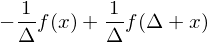

In [1]:
import sympy as sy
sy.init_printing()
f, x, Delta = sy.symbols('f x Delta')
fp = sy.diff(f(x), x)
fp.as_finite_difference([x, x+Delta])

Getting the *weights* for each term:

In [2]:
w = sy.finite_diff_weights(order=2, x_list=[x-Delta, x, x+Delta], x0=x)
w[0] # "zeroth" derivative weights using just x-Delta, then both x-Delta and x, and finally all three

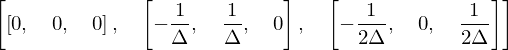

In [3]:
w[1] # f' weights

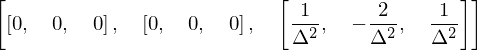

In [4]:
w[2] # f'' weights

**Exercise**: Develop a second-order approximation for $f'(x)$ that does *not* use values less than $x$.

## Recap

You should now be able to 

- Derive finite-difference approximations for first- and second-order derivatives using Taylor series.
- Apply SymPy to compute finite-difference approximations of arbitrary order for any derivative.
- Numerically/graphically/symbolically demonstrate that the error of an $n$th-order approximation as $\Delta \to 0$ exhibits the right behavior.